# charts.ipynb

This notebook generates figures that track the fluctuation in various HbA1c measures during the COVID-19 pandemic.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

## Data Import

In [3]:
# Read in input files
li = []

for file in glob('../output/data/input*.csv'):
    if file.split('_')[1] not in ['ethnicity.csv']:
        df_temp = pd.read_csv(file)
        df_temp['date'] = file[21:-4]
        df_temp['hba1c_test'] = 1
        li.append(df_temp)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)

In [4]:
# Segment the data by diabetes status
df_t1dm = df_input.loc[df_input.diabetes_type == 'T1DM']
df_t2dm = df_input.loc[df_input.diabetes_type == 'T2DM']

## Total Number

In [5]:
def create_chart(measure, group, title, df, ax):
    """Creates formatted scatterplots displaying line of best fit and
    correlation coefficients with associated p-values.
    """
    # Create the scatter plot
    sns.lineplot(x='date', y=measure, legend=True,
                 hue=group, data=df, ax=ax, ci=None)
    
    # Set title and make axes labels empty
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

In [6]:
# Variables by which to subset
subset_vars = ['date','hba1c_test',
               'hba1c_gt_48','hba1c_gt_58',
               'hba1c_gt_64','hba1c_gt_75']

In [7]:
# Monthly total
df_total = df_input[subset_vars].groupby('date').sum().reset_index()
df_total_t1dm = df_t1dm[subset_vars].groupby('date').sum().reset_index()
df_total_t2dm = df_t2dm[subset_vars].groupby('date').sum().reset_index()

In [8]:
# Group by demographics 
def sum_by_group(group):
    sum_input = df_input[[group] + subset_vars].groupby(['date', group]).sum().reset_index()
    sum_t1dm = df_t1dm[[group] + subset_vars].groupby(['date', group]).sum().reset_index()
    sum_t2dm = df_t2dm[[group] + subset_vars].groupby(['date', group]).sum().reset_index()
    return sum_input, sum_t1dm, sum_t2dm

In [9]:
df_age, df_age_t1dm, df_age_t2dm = sum_by_group('age_group')
df_sex, df_sex_t1dm, df_sex_t2dm = sum_by_group('sex')
df_eth, df_eth_t1dm, df_eth_t2dm = sum_by_group('ethnicity')
df_reg, df_reg_t1dm, df_reg_t2dm = sum_by_group('region')
df_imd, df_imd_t1dm, df_imd_t2dm = sum_by_group('imd')
df_ld, df_ld_t1dm, df_ld_t2dm = sum_by_group('learning_disability')
df_mi, df_mi_t1dm, df_mi_t2dm = sum_by_group('mental_illness')

In [42]:
# Functions to generate charts
def create_chart(title, df, ax):
    """Creates formatted scatterplots displaying line of best fit and
    correlation coefficients with associated p-values.
    """
    # Create the scatter plot
    sns.lineplot(x='date', y='hba1c_test', legend=True,
                 data=df, ax=ax)
    
    # Set title and make axes labels empty
    ax.fill_between(df.date, df.hba1c_gt_48.min(), 
                df.hba1c_gt_48, facecolor='blue', alpha=0.2)
    ax.fill_between(df.date, df.hba1c_gt_58.min(), 
                    df.hba1c_gt_58, facecolor='blue', alpha=0.4)
    ax.fill_between(df.date, df.hba1c_gt_64.min(), 
                    df.hba1c_gt_64, facecolor='blue', alpha=0.7)
    ax.fill_between(df.date, df.hba1c_gt_75.min(), 
                    df.hba1c_gt_75, facecolor='blue', alpha=1)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

def create_subplot(measure, group, title, df, ax):
    """Creates formatted scatterplots displaying line of best fit and
    correlation coefficients with associated p-values.
    """
    # Create the scatter plot
    sns.lineplot(x='date', y=measure, legend=True,
                 hue=group, data=df, ax=ax)
    
    # Set title and make axes labels empty
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

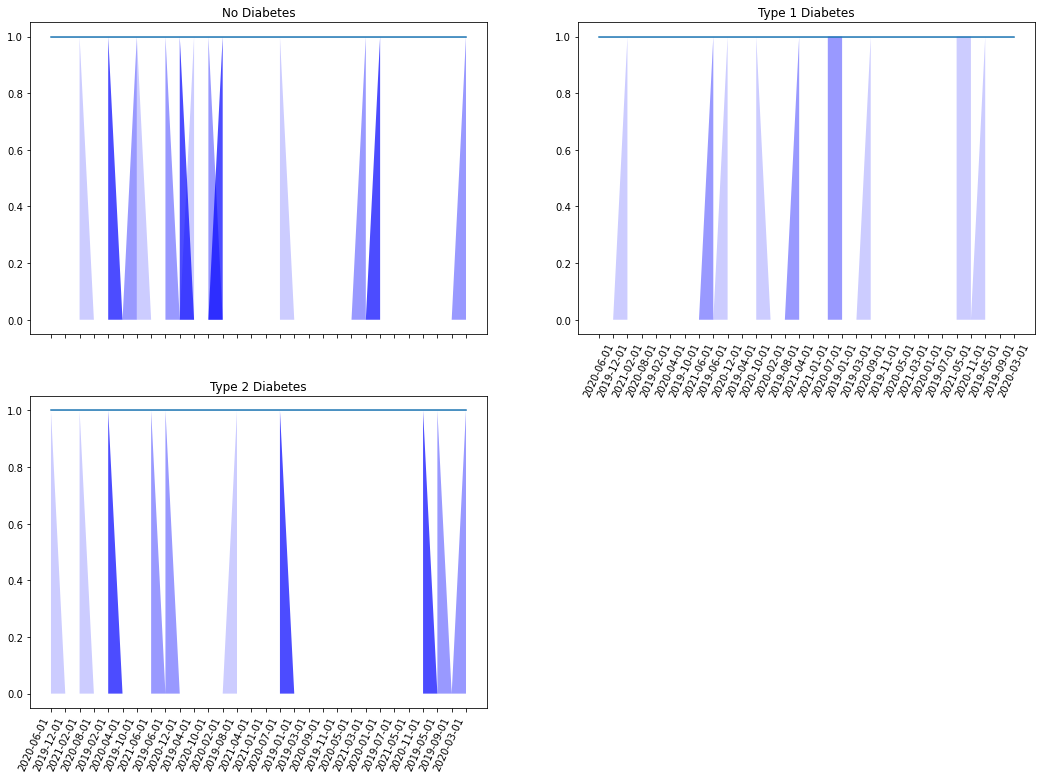

In [66]:
# Total number
fig, axes = plt.subplots(2,2, figsize=(18, 14))
fig.delaxes(ax=axes[1,1])
create_chart('No Diabetes', df_input, axes[0,0])
create_chart('Type 1 Diabetes', df_t1dm, axes[0,1])
create_chart('Type 2 Diabetes', df_t2dm, axes[1,0])
fig.autofmt_xdate(rotation=65)
axes[0,1].xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=65)
plt.show()

In [72]:
# Total number by threshold
def create_plotgrid(measure, df_age_in, df_sex_in, df_eth_in, 
                   df_reg_in, df_imd_in, df_ld_in, df_mi_in,
                   ylabel):
    fig2, axes2 = plt.subplots(4, 2, figsize=(16, 16), sharex=True, sharey=True)
    fig2.delaxes(ax=axes2[3,1])

    create_subplot(measure, 'age_group', 'Age Group', 
                   df_age_in.loc[df_age_in.age_group != 'missing'], axes2[0,0])
    create_subplot(measure, 'sex', 'Sex', 
                   df_sex_in.loc[df_sex_in.sex.isin(['F','M'])], axes2[0,1])
    create_subplot(measure, 'ethnicity', 'Ethnicity', 
                   df_eth_in, axes2[1,0])
    create_subplot(measure, 'region', 'Region', 
                   df_reg_in, axes2[1,1])
    create_subplot(measure, 'imd', 'IMD', 
                   df_imd_in, axes2[2,0])
    create_subplot(measure, 'learning_disability', 'Learning Disability', 
                   df_ld_in, axes2[2,1])
    create_subplot(measure, 'mental_illness', 'Mental Illness', 
                   df_mi_in, axes2[3,0])

    # Set axes labels
    plt.setp(axes2[-1, :],
             xlabel='Date')
    plt.setp(axes2[:, 0],
             ylabel=ylabel)
    fig2.autofmt_xdate(rotation=65)
    fig2.subplots_adjust(hspace=0.1)
    fig2.subplots_adjust(wspace=0)
    fig2.tight_layout()
    axes2[2,1].xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=65)
    plt.show()

### By Demographics

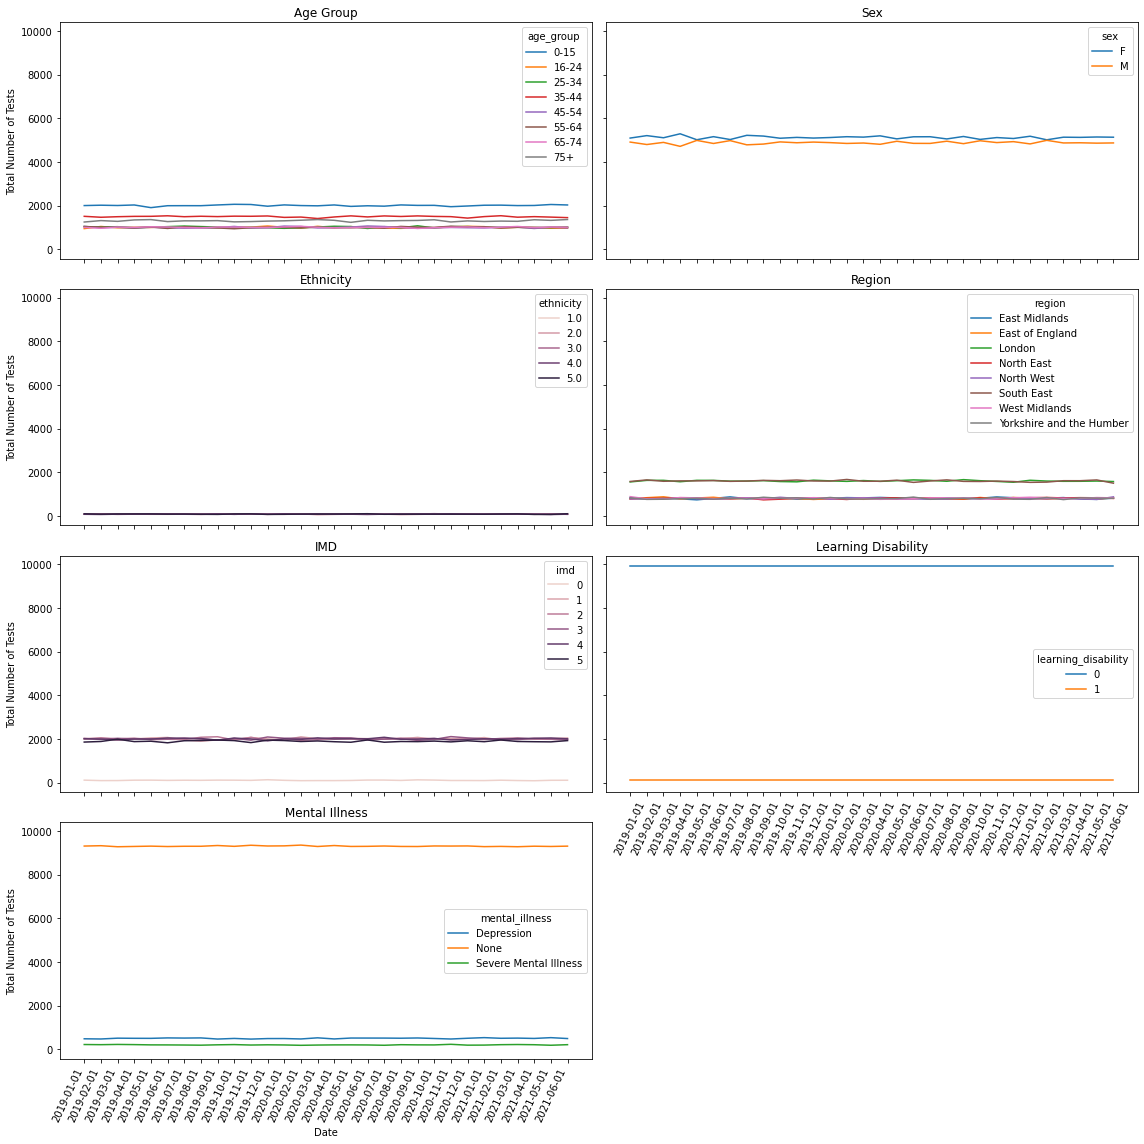

In [73]:
# No diabetes
create_plotgrid('hba1c_test',df_age, df_sex, df_eth,
                df_reg, df_imd, df_ld, df_mi, 'Total Number of Tests')

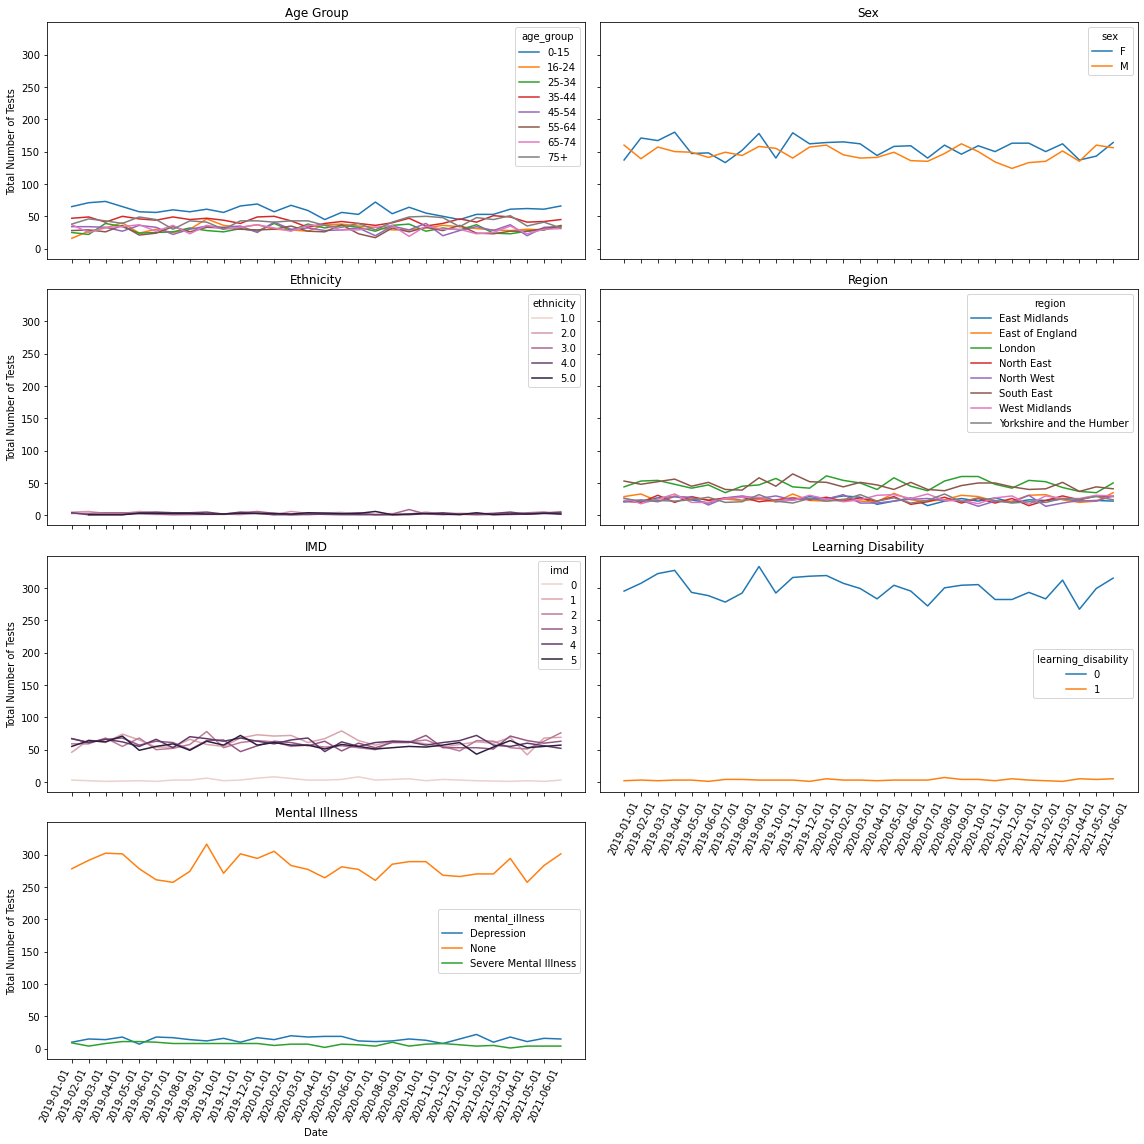

In [75]:
# T1DM
create_plotgrid('hba1c_test',df_age_t1dm, df_sex_t1dm, df_eth_t1dm,
                df_reg_t1dm, df_imd_t1dm, df_ld_t1dm, df_mi_t1dm, 'Total Number of Tests')

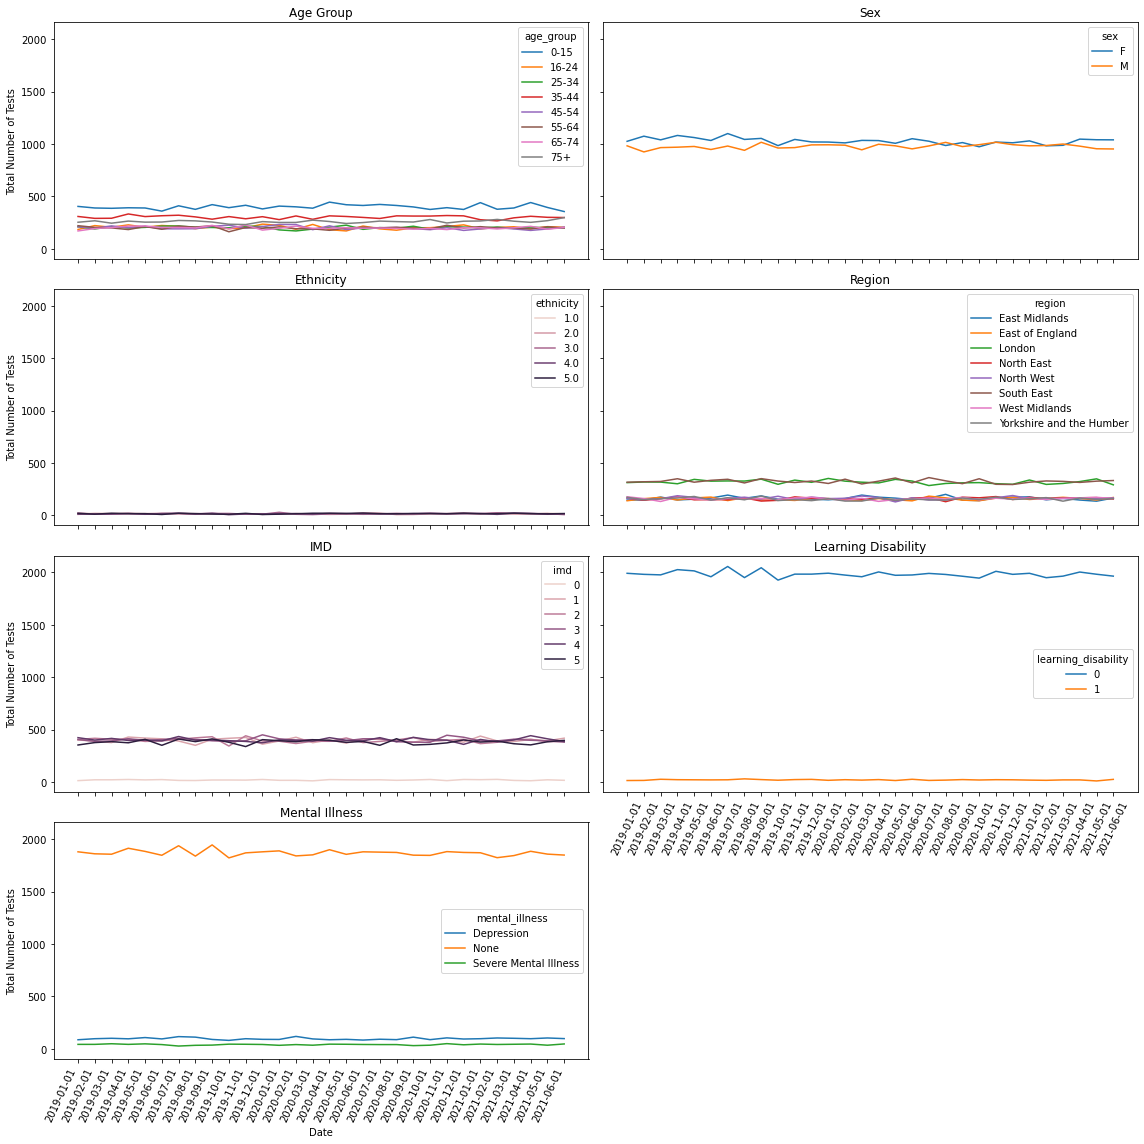

In [76]:
# T2DM
create_plotgrid('hba1c_test',df_age_t2dm, df_sex_t2dm, df_eth_t2dm,
                df_reg_t2dm, df_imd_t2dm, df_ld_t2dm, df_mi_t2dm, 'Total Number of Tests')

## Tests by Threshold for Those with T2DM

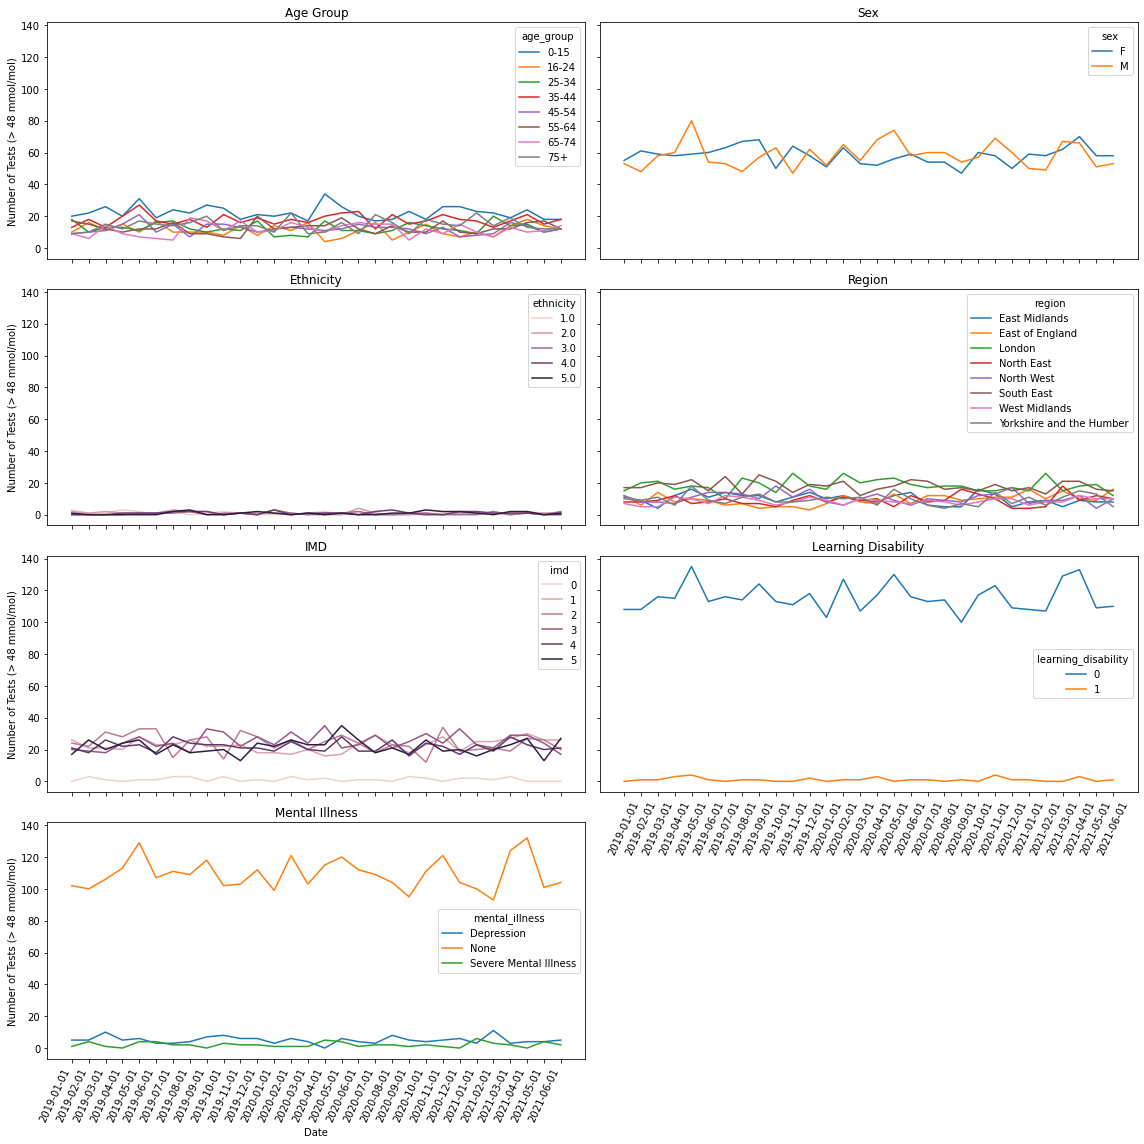

In [77]:
# > 48
create_plotgrid('hba1c_gt_48',df_age_t2dm, df_sex_t2dm, df_eth_t2dm,
                df_reg_t2dm, df_imd_t2dm, df_ld_t2dm, df_mi_t2dm, 'Number of Tests (> 48 mmol/mol)')

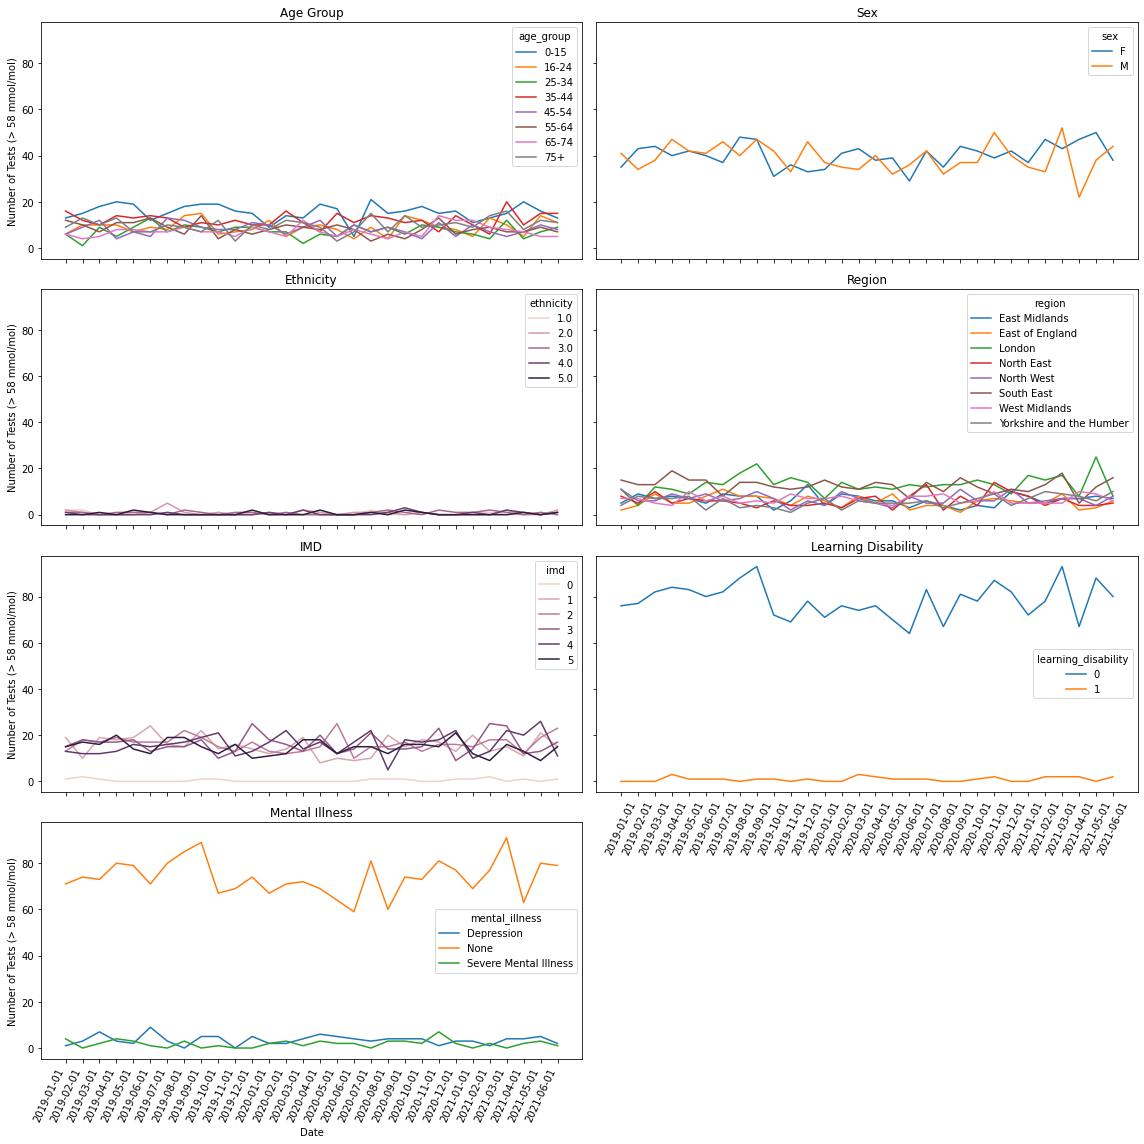

In [79]:
# > 58
create_plotgrid('hba1c_gt_58',df_age_t2dm, df_sex_t2dm, df_eth_t2dm,
                df_reg_t2dm, df_imd_t2dm, df_ld_t2dm, df_mi_t2dm, 'Number of Tests (> 58 mmol/mol)')

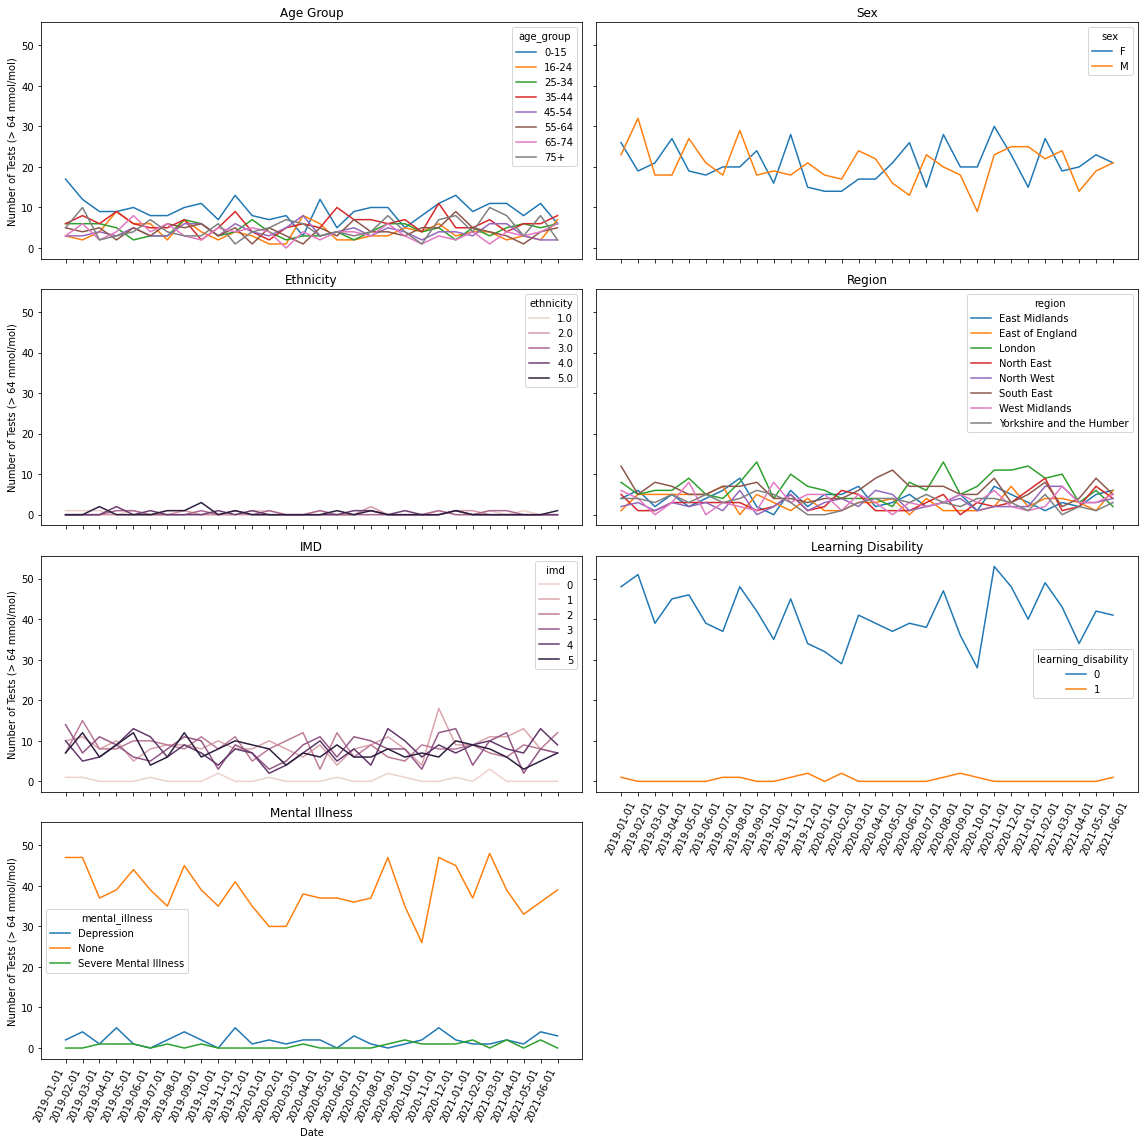

In [80]:
# > 64
create_plotgrid('hba1c_gt_64',df_age_t2dm, df_sex_t2dm, df_eth_t2dm,
                df_reg_t2dm, df_imd_t2dm, df_ld_t2dm, df_mi_t2dm, 'Number of Tests (> 64 mmol/mol)')

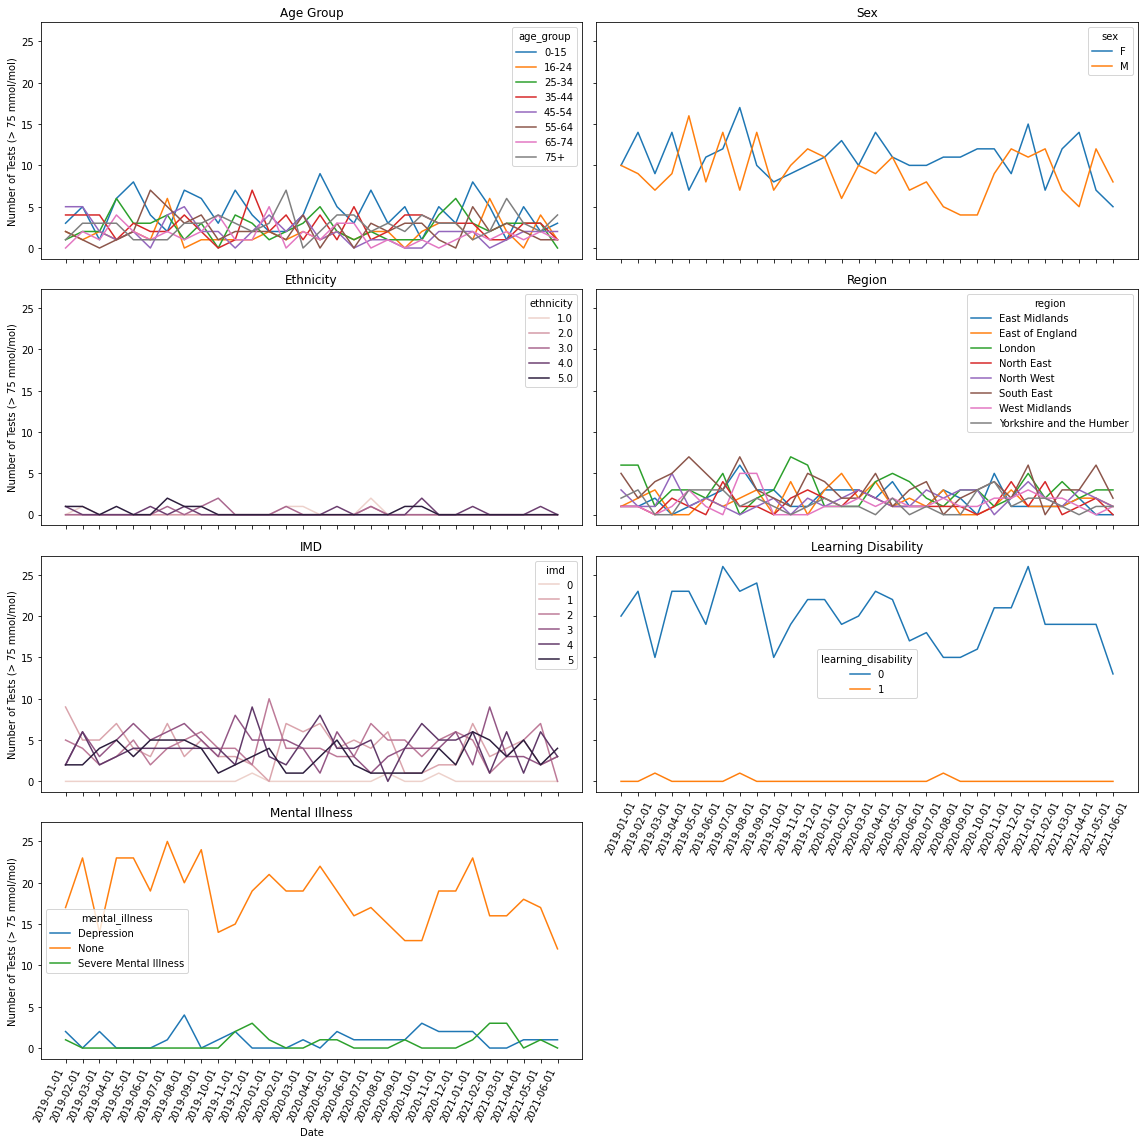

In [81]:
# > 75
create_plotgrid('hba1c_gt_75',df_age_t2dm, df_sex_t2dm, df_eth_t2dm,
                df_reg_t2dm, df_imd_t2dm, df_ld_t2dm, df_mi_t2dm, 'Number of Tests (> 75 mmol/mol)')